<a href="https://colab.research.google.com/github/deegeorgie/My-Python-scripts/blob/master/horse_betting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bulding a model for horse betting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./drive/My Drive/quinte_29_septembre_20.csv')
df = df.drop(['Unnamed: 0', 'Date'], axis=1)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place
0,EL MANIFICO,58.0,LONGCHAMP,2000,Bon,PRIX DE LA TABLE,40000,DEMURO C.,SMAGA D.,Plat,40.5,20.0,3
1,EL MANIFICO,56.0,DEAUVILLE,2000,Souple,PRIX ETALON MU...,40000,DEMURO C.,SMAGA D.,Plat,37.5,17.0,1
2,EL MANIFICO,60.0,DEAUVILLE,1900,PSF,PRIX LE MEETIN...,40000,DEMURO C.,SMAGA D.,Plat,37.5,7.7,6
3,EL MANIFICO,55.5,CHANTILLY,1600,Bon,PRIX DE LA CHA...,40000,DEMURO C.,SMAGA D.,Plat,37.5,11.0,4
4,EL MANIFICO,60.5,CLAIREFONTAINE,1600,Souple,PRIX DE L'ORAN...,40000,BADEL A.,SMAGA D.,Plat,38.0,12.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,PHAROA,57.0,DEAUVILLE,1900,PSF,PRIX DE DIVES,28000,MOSSE G.,DUBOIS J.PH.,Plat,35.0,17.0,5
326,PHAROA,58.0,LONGCHAMP,2100,Bon,PRIX DE LA BAR...,25000,BARONA MLLE A.,DUBOIS J.PH.,Plat,35.0,12.0,3
327,PHAROA,57.0,MORLAIX,1800,NaN,PRIX JACQUES C...,8500,BARONA MLLE A.,DUBOIS J.PH.,Plat,NaN,NaN,3
328,PHAROA,58.0,DIEPPE,1800,Collant,PRIX CLARKSON,20000,DEMURO C.,DUBOIS J.PH.,Plat,NaN,5.5,6


## Let's encode some of the columns

- Cheval
- Jockey
- Hyppodrome
- Entraineur

In [2]:
horse_ids = {}
jockey_ids = {}
hippo_ids = {}
trainer_ids = {}

for index, value in enumerate(df['Cheval'].unique(), 1):   
    #print(f'{index}: {value}')
    horse_ids.update({value: index})
    
for ind, val in enumerate(df['Jockey'].unique(), 1):
    jockey_ids.update({val: ind})
    
for num, hip in enumerate(df['Hippodrome'].unique(), 1):
    hippo_ids.update({hip: num})

for i, trainer in enumerate(df['Entraineur'].unique(), 1):
    trainer_ids.update({trainer: i})
    
jockey_ids
horse_ids
hippo_ids
trainer_ids

df['Cheval'] = df['Cheval'].map(horse_ids)
df['Jockey'] = df['Jockey'].map(jockey_ids)
df['Hippodrome'] = df['Hippodrome'].map(hippo_ids)
df['Entraineur'] = df['Entraineur'].map(trainer_ids)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place
0,1,58.0,1,2000,Bon,PRIX DE LA TABLE,40000,1,1,Plat,40.5,20.0,3
1,1,56.0,2,2000,Souple,PRIX ETALON MU...,40000,1,1,Plat,37.5,17.0,1
2,1,60.0,2,1900,PSF,PRIX LE MEETIN...,40000,1,1,Plat,37.5,7.7,6
3,1,55.5,3,1600,Bon,PRIX DE LA CHA...,40000,1,1,Plat,37.5,11.0,4
4,1,60.5,4,1600,Souple,PRIX DE L'ORAN...,40000,2,1,Plat,38.0,12.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,PSF,PRIX DE DIVES,28000,32,27,Plat,35.0,17.0,5
326,16,58.0,1,2100,Bon,PRIX DE LA BAR...,25000,72,27,Plat,35.0,12.0,3
327,16,57.0,43,1800,NaN,PRIX JACQUES C...,8500,72,27,Plat,NaN,NaN,3
328,16,58.0,9,1800,Collant,PRIX CLARKSON,20000,1,27,Plat,NaN,5.5,6


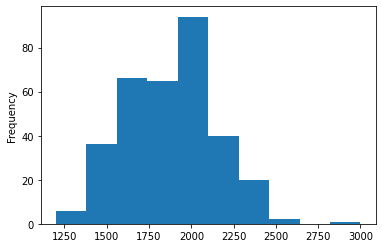

In [ ]:
df['Distance(m)'].plot(kind='hist')

## Convert Place values to numeric and map values to make them digestible by model

Place map stands as follows:
- A horse that is stopped (ARR) or has value NaN for Place is ranked 0
- 1 (Place)
- 0 (Not)

In [3]:
df["Place"] = pd.to_numeric(df['Place'], errors='coerce').astype('Int64')
df["Place"] = df["Place"].fillna(5)
def map_places(place):
    if place == 1:
        place = 1
    elif place == 2 or place == 3:
        place = 1
    else:
        place = 0
    return(place)

df['outcome'] = df['Place'].map(map_places)
df['outcome'] = df['outcome'].astype('category')
df['outcome'] = df['outcome'].cat.as_ordered()
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,Bon,PRIX DE LA TABLE,40000,1,1,Plat,40.5,20.0,3,1
1,1,56.0,2,2000,Souple,PRIX ETALON MU...,40000,1,1,Plat,37.5,17.0,1,1
2,1,60.0,2,1900,PSF,PRIX LE MEETIN...,40000,1,1,Plat,37.5,7.7,6,0
3,1,55.5,3,1600,Bon,PRIX DE LA CHA...,40000,1,1,Plat,37.5,11.0,4,0
4,1,60.5,4,1600,Souple,PRIX DE L'ORAN...,40000,2,1,Plat,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,PSF,PRIX DE DIVES,28000,32,27,Plat,35.0,17.0,5,0
326,16,58.0,1,2100,Bon,PRIX DE LA BAR...,25000,72,27,Plat,35.0,12.0,3,1
327,16,57.0,43,1800,NaN,PRIX JACQUES C...,8500,72,27,Plat,NaN,NaN,3,1
328,16,58.0,9,1800,Collant,PRIX CLARKSON,20000,1,27,Plat,NaN,5.5,6,0


## Valeur
For missing values in this column, we replace with the median value of said horse

In [4]:
df['Valeur'].fillna(df.groupby("Cheval")["Valeur"].transform("median"), inplace=True)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,Bon,PRIX DE LA TABLE,40000,1,1,Plat,40.5,20.0,3,1
1,1,56.0,2,2000,Souple,PRIX ETALON MU...,40000,1,1,Plat,37.5,17.0,1,1
2,1,60.0,2,1900,PSF,PRIX LE MEETIN...,40000,1,1,Plat,37.5,7.7,6,0
3,1,55.5,3,1600,Bon,PRIX DE LA CHA...,40000,1,1,Plat,37.5,11.0,4,0
4,1,60.5,4,1600,Souple,PRIX DE L'ORAN...,40000,2,1,Plat,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,PSF,PRIX DE DIVES,28000,32,27,Plat,35.0,17.0,5,0
326,16,58.0,1,2100,Bon,PRIX DE LA BAR...,25000,72,27,Plat,35.0,12.0,3,1
327,16,57.0,43,1800,NaN,PRIX JACQUES C...,8500,72,27,Plat,35.0,NaN,3,1
328,16,58.0,9,1800,Collant,PRIX CLARKSON,20000,1,27,Plat,35.0,5.5,6,0


## Terrain
Values of this column are mapped as follows:

- 0 (Lourd)
- 1 (Bon)
- 2 (Souple)
- 3 (Collant)
- 4 (PSF)

In [5]:
def map_terrain(field):

    if field == 'Lourd':
        field = '0'
    elif field == 'Bon':
        field = '1'
    elif field == 'Souple':
        field = '2'
    elif field == 'Collant':
        field = '3'
    elif field == 'PSF':
        field = '4'

    return(field)

df['Terrain'] = df['Terrain'].map(map_terrain)
df['Terrain'] = df['Terrain'].astype('category')

df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,1,PRIX DE LA TABLE,40000,1,1,Plat,40.5,20.0,3,1
1,1,56.0,2,2000,2,PRIX ETALON MU...,40000,1,1,Plat,37.5,17.0,1,1
2,1,60.0,2,1900,4,PRIX LE MEETIN...,40000,1,1,Plat,37.5,7.7,6,0
3,1,55.5,3,1600,1,PRIX DE LA CHA...,40000,1,1,Plat,37.5,11.0,4,0
4,1,60.5,4,1600,2,PRIX DE L'ORAN...,40000,2,1,Plat,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,4,PRIX DE DIVES,28000,32,27,Plat,35.0,17.0,5,0
326,16,58.0,1,2100,1,PRIX DE LA BAR...,25000,72,27,Plat,35.0,12.0,3,1
327,16,57.0,43,1800,NaN,PRIX JACQUES C...,8500,72,27,Plat,35.0,NaN,3,1
328,16,58.0,9,1800,3,PRIX CLARKSON,20000,1,27,Plat,35.0,5.5,6,0


In [6]:
df['Terrain'].fillna(df["Terrain"].mode()[0], inplace=True)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,1,PRIX DE LA TABLE,40000,1,1,Plat,40.5,20.0,3,1
1,1,56.0,2,2000,2,PRIX ETALON MU...,40000,1,1,Plat,37.5,17.0,1,1
2,1,60.0,2,1900,4,PRIX LE MEETIN...,40000,1,1,Plat,37.5,7.7,6,0
3,1,55.5,3,1600,1,PRIX DE LA CHA...,40000,1,1,Plat,37.5,11.0,4,0
4,1,60.5,4,1600,2,PRIX DE L'ORAN...,40000,2,1,Plat,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,4,PRIX DE DIVES,28000,32,27,Plat,35.0,17.0,5,0
326,16,58.0,1,2100,1,PRIX DE LA BAR...,25000,72,27,Plat,35.0,12.0,3,1
327,16,57.0,43,1800,1,PRIX JACQUES C...,8500,72,27,Plat,35.0,NaN,3,1
328,16,58.0,9,1800,3,PRIX CLARKSON,20000,1,27,Plat,35.0,5.5,6,0


## Specialite
Maps as follows:

- 0 (Steeple)
- 1 (Haie)

In [7]:
def map_spec(spec):
    if spec == 'Steeple':
        spec = '0'
    elif spec == 'Haie':
        spec = '1'
    else:
        spec = '3'
    return(spec)

df['Specialite'] = df['Specialite'].map(map_spec)
df['Specialite'] = df['Specialite'].astype('category')
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,1,PRIX DE LA TABLE,40000,1,1,3,40.5,20.0,3,1
1,1,56.0,2,2000,2,PRIX ETALON MU...,40000,1,1,3,37.5,17.0,1,1
2,1,60.0,2,1900,4,PRIX LE MEETIN...,40000,1,1,3,37.5,7.7,6,0
3,1,55.5,3,1600,1,PRIX DE LA CHA...,40000,1,1,3,37.5,11.0,4,0
4,1,60.5,4,1600,2,PRIX DE L'ORAN...,40000,2,1,3,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,4,PRIX DE DIVES,28000,32,27,3,35.0,17.0,5,0
326,16,58.0,1,2100,1,PRIX DE LA BAR...,25000,72,27,3,35.0,12.0,3,1
327,16,57.0,43,1800,1,PRIX JACQUES C...,8500,72,27,3,35.0,NaN,3,1
328,16,58.0,9,1800,3,PRIX CLARKSON,20000,1,27,3,35.0,5.5,6,0


## Allocation binning

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


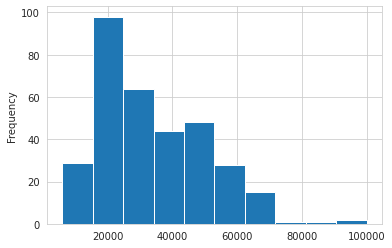

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
df['Allocation(€)'].plot(kind='hist')

In [8]:
bin_labels_5 = ['0', '1', '2', '3']
df['Allocation(€)'] = pd.qcut(df['Allocation(€)'], q=4,
       labels=bin_labels_5)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2000,1,PRIX DE LA TABLE,2,1,1,3,40.5,20.0,3,1
1,1,56.0,2,2000,2,PRIX ETALON MU...,2,1,1,3,37.5,17.0,1,1
2,1,60.0,2,1900,4,PRIX LE MEETIN...,2,1,1,3,37.5,7.7,6,0
3,1,55.5,3,1600,1,PRIX DE LA CHA...,2,1,1,3,37.5,11.0,4,0
4,1,60.5,4,1600,2,PRIX DE L'ORAN...,2,2,1,3,38.0,12.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1900,4,PRIX DE DIVES,1,32,27,3,35.0,17.0,5,0
326,16,58.0,1,2100,1,PRIX DE LA BAR...,1,72,27,3,35.0,12.0,3,1
327,16,57.0,43,1800,1,PRIX JACQUES C...,0,72,27,3,35.0,NaN,3,1
328,16,58.0,9,1800,3,PRIX CLARKSON,0,1,27,3,35.0,5.5,6,0


## Distance binning

In [9]:
bin_labels_4 = ['0', '1', '2', '3']
df['Distance(m)'] = pd.qcut(df['Distance(m)'], q=4,
       labels=bin_labels_4)
df.head()

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2,1,PRIX DE LA TABLE,2,1,1,3,40.5,20.0,3,1
1,1,56.0,2,2,2,PRIX ETALON MU...,2,1,1,3,37.5,17.0,1,1
2,1,60.0,2,1,4,PRIX LE MEETIN...,2,1,1,3,37.5,7.7,6,0
3,1,55.5,3,0,1,PRIX DE LA CHA...,2,1,1,3,37.5,11.0,4,0
4,1,60.5,4,0,2,PRIX DE L'ORAN...,2,2,1,3,38.0,12.0,7,0


In [ ]:
df.dtypes

Cheval              int64
Poids             float64
Hippodrome          int64
Distance(m)      category
Terrain          category
Prix               object
Allocation(€)    category
Jockey              int64
Entraineur          int64
Specialite       category
Valeur            float64
Cote              float64
Place               Int64
outcome          category
dtype: object

## Cote binning

In [10]:
df['Cote'].fillna(df.groupby("Cheval")["Cote"].transform("median"), inplace=True)
pd.qcut(df['Cote'], q=4)

0       (15.95, 81.2]
1       (15.95, 81.2]
2        (6.6, 10.05]
3      (10.05, 15.95]
4      (10.05, 15.95]
            ...      
325     (15.95, 81.2]
326    (10.05, 15.95]
327    (10.05, 15.95]
328      (1.199, 6.6]
329     (15.95, 81.2]
Name: Cote, Length: 330, dtype: category
Categories (4, interval[float64]): [(1.199, 6.6] < (6.6, 10.05] < (10.05, 15.95] < (15.95, 81.2]]

In [11]:
bin_label_5 = ['0', '1', '2', '3']
df['Cote'] = pd.qcut(df['Cote'], q=4,
       labels=bin_label_5)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2,1,PRIX DE LA TABLE,2,1,1,3,40.5,3,3,1
1,1,56.0,2,2,2,PRIX ETALON MU...,2,1,1,3,37.5,3,1,1
2,1,60.0,2,1,4,PRIX LE MEETIN...,2,1,1,3,37.5,1,6,0
3,1,55.5,3,0,1,PRIX DE LA CHA...,2,1,1,3,37.5,2,4,0
4,1,60.5,4,0,2,PRIX DE L'ORAN...,2,2,1,3,38.0,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1,4,PRIX DE DIVES,1,32,27,3,35.0,3,5,0
326,16,58.0,1,3,1,PRIX DE LA BAR...,1,72,27,3,35.0,2,3,1
327,16,57.0,43,1,1,PRIX JACQUES C...,0,72,27,3,35.0,2,3,1
328,16,58.0,9,1,3,PRIX CLARKSON,0,1,27,3,35.0,0,6,0


## Valeur binning

In [12]:
bin_label_5 = ['0', '1', '2', '3']
df['Valeur'] = pd.qcut(df['Valeur'], q=4,
       labels=bin_label_5)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,58.0,1,2,1,PRIX DE LA TABLE,2,1,1,3,3,3,3,1
1,1,56.0,2,2,2,PRIX ETALON MU...,2,1,1,3,2,3,1,1
2,1,60.0,2,1,4,PRIX LE MEETIN...,2,1,1,3,2,1,6,0
3,1,55.5,3,0,1,PRIX DE LA CHA...,2,1,1,3,2,2,4,0
4,1,60.5,4,0,2,PRIX DE L'ORAN...,2,2,1,3,2,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,57.0,2,1,4,PRIX DE DIVES,1,32,27,3,0,3,5,0
326,16,58.0,1,3,1,PRIX DE LA BAR...,1,72,27,3,0,2,3,1
327,16,57.0,43,1,1,PRIX JACQUES C...,0,72,27,3,0,2,3,1
328,16,58.0,9,1,3,PRIX CLARKSON,0,1,27,3,0,0,6,0


## Poids binning

In [13]:
bin_label_5 = ['0', '1', '2', '3']
df['Poids'] = pd.qcut(df['Poids'], q=4,
       labels=bin_label_5)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Prix,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,Place,outcome
0,1,1,1,2,1,PRIX DE LA TABLE,2,1,1,3,3,3,3,1
1,1,0,2,2,2,PRIX ETALON MU...,2,1,1,3,2,3,1,1
2,1,3,2,1,4,PRIX LE MEETIN...,2,1,1,3,2,1,6,0
3,1,0,3,0,1,PRIX DE LA CHA...,2,1,1,3,2,2,4,0
4,1,3,4,0,2,PRIX DE L'ORAN...,2,2,1,3,2,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,1,2,1,4,PRIX DE DIVES,1,32,27,3,0,3,5,0
326,16,1,1,3,1,PRIX DE LA BAR...,1,72,27,3,0,2,3,1
327,16,1,43,1,1,PRIX JACQUES C...,0,72,27,3,0,2,3,1
328,16,1,9,1,3,PRIX CLARKSON,0,1,27,3,0,0,6,0


## Let's drop some columns

In [14]:
df = df.drop(['Prix','Place'], axis=1)
df

,Cheval,Poids,Hippodrome,Distance(m),Terrain,Allocation(€),Jockey,Entraineur,Specialite,Valeur,Cote,outcome
0,1,1,1,2,1,2,1,1,3,3,3,1
1,1,0,2,2,2,2,1,1,3,2,3,1
2,1,3,2,1,4,2,1,1,3,2,1,0
3,1,0,3,0,1,2,1,1,3,2,2,0
4,1,3,4,0,2,2,2,1,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,16,1,2,1,4,1,32,27,3,0,3,0
326,16,1,1,3,1,1,72,27,3,0,2,1
327,16,1,43,1,1,0,72,27,3,0,2,1
328,16,1,9,1,3,0,1,27,3,0,0,0


In [16]:
df['Cheval'] = df['Cheval'].astype('str')
df['Hippodrome'] = df['Hippodrome'].astype('str')
df['Distance(m)'] = df['Distance(m)'].astype('int')
df['Allocation(€)'] = df['Allocation(€)'].astype('int')
df['Jockey'] = df['Jockey'].astype('str')
df['Entraineur'] = df['Entraineur'].astype('str')
df['Cote'] = df['Cote'].astype(float)
df['Valeur'] = df['Valeur'].astype(float)
df.dtypes

Cheval             object
Poids            category
Hippodrome         object
Distance(m)         int64
Terrain          category
Allocation(€)       int64
Jockey             object
Entraineur         object
Specialite       category
Valeur            float64
Cote              float64
outcome          category
dtype: object

## The Model

In [17]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = df.values
X = array[:,0:8]
y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
Y_train = Y_train.astype(int)

In [19]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: nan (nan)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: nan (nan)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 3

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 3

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contain